# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('MKM_Timesheet_Project.csv')
df.head()

,Initials,Date,Course_ID,Time (min),Summary
0,MKM,1/9/2023,DS 160-01,5,Finished filling in quartiles and maximum on P...
1,MKM,1/9/2023,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...
2,MKM,1/10/2023,ENVS 320-01,82,Finished class notes
3,MKM,1/16/2023,ENVS 320-01,60,Finished Lab and submited
4,MKM,1/17/2023,DS 160-01,30,finished assignment one and submitted


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
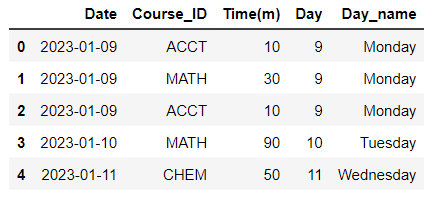

In [3]:
#converting the date formate
df['Date']=pd.to_datetime(df['Date'])
df.head() 

,Initials,Date,Course_ID,Time (min),Summary
0,MKM,2023-01-09,DS 160-01,5,Finished filling in quartiles and maximum on P...
1,MKM,2023-01-09,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...
2,MKM,2023-01-10,ENVS 320-01,82,Finished class notes
3,MKM,2023-01-16,ENVS 320-01,60,Finished Lab and submited
4,MKM,2023-01-17,DS 160-01,30,finished assignment one and submitted


In [4]:
#using the date column to get the day of the month and the day of the week 
df['Day']=df['Date'].dt.day
df['Day_Name']=df['Date'].dt.day_name()
df.head()

,Initials,Date,Course_ID,Time (min),Summary,Day,Day_Name
0,MKM,2023-01-09,DS 160-01,5,Finished filling in quartiles and maximum on P...,9,Monday
1,MKM,2023-01-09,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...,9,Monday
2,MKM,2023-01-10,ENVS 320-01,82,Finished class notes,10,Tuesday
3,MKM,2023-01-16,ENVS 320-01,60,Finished Lab and submited,16,Monday
4,MKM,2023-01-17,DS 160-01,30,finished assignment one and submitted,17,Tuesday


In [5]:
df.columns

Index(['Initials ', 'Date', 'Course_ID', 'Time (min)', 'Summary', 'Day',
       'Day_Name'],
      dtype='object')

In [6]:
df.drop(['Initials ', 'Summary'], axis=1, inplace=True)
#dropping Initial and Summary collumn to match the example and to also remove columns that cannot be used for anlaysis

In [7]:
df.head()

,Date,Course_ID,Time (min),Day,Day_Name
0,2023-01-09,DS 160-01,5,9,Monday
1,2023-01-09,PHIL 301-01,70,9,Monday
2,2023-01-10,ENVS 320-01,82,10,Tuesday
3,2023-01-16,ENVS 320-01,60,16,Monday
4,2023-01-17,DS 160-01,30,17,Tuesday


In [8]:
df['Time(m)']=df['Time (min)']
df.drop(['Time (min)'], axis=1, inplace=True)
df.head()

,Date,Course_ID,Day,Day_Name,Time(m)
0,2023-01-09,DS 160-01,9,Monday,5
1,2023-01-09,PHIL 301-01,9,Monday,70
2,2023-01-10,ENVS 320-01,10,Tuesday,82
3,2023-01-16,ENVS 320-01,16,Monday,60
4,2023-01-17,DS 160-01,17,Tuesday,30


In [9]:
df=df[['Date','Course_ID','Time(m)','Day','Day_Name']]
df.head()

,Date,Course_ID,Time(m),Day,Day_Name
0,2023-01-09,DS 160-01,5,9,Monday
1,2023-01-09,PHIL 301-01,70,9,Monday
2,2023-01-10,ENVS 320-01,82,10,Tuesday
3,2023-01-16,ENVS 320-01,60,16,Monday
4,2023-01-17,DS 160-01,30,17,Tuesday


### Answer the questions

In [10]:
# What is the average time you have spend for learning?
print("Average Time Spent:", np.round(np.mean(np.array(df['Time(m)']))))

Average Time Spent: 52.0


In [11]:
df.columns

Index(['Date', 'Course_ID', 'Time(m)', 'Day', 'Day_Name'], dtype='object')

In [12]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['Time(m)']>52)]

,Date,Course_ID,Time(m),Day,Day_Name
1,2023-01-09,PHIL 301-01,70,9,Monday
2,2023-01-10,ENVS 320-01,82,10,Tuesday
3,2023-01-16,ENVS 320-01,60,16,Monday
5,2023-01-18,ENVS 390-01,70,18,Wednesday
8,2023-01-20,DS 160-01,70,20,Friday
12,2023-01-23,ENVS 320-01,130,23,Monday
13,2023-01-24,ENVS 320-01,120,24,Tuesday
14,2023-01-24,ENVS 320-01,140,24,Tuesday
15,2023-01-24,ENVS 320-01,120,24,Tuesday
25,2023-02-08,ENVS 390-01,90,8,Wednesday


In [13]:
print('Max Time Spent:', np.max(np.array(df['Time(m)'])))

Max Time Spent: 140


In [14]:
# Which course you have spent the maximum time to prepare?
df.loc[(df['Time(m)']==140)]

,Date,Course_ID,Time(m),Day,Day_Name
14,2023-01-24,ENVS 320-01,140,24,Tuesday


In [15]:
# Which day of the week you spent most of the time?
df['Day_Name'].value_counts()

Monday       12
Tuesday       5
Wednesday     5
Sunday        5
Friday        1
Name: Day_Name, dtype: int64

### Investigate the distribution of Time, adding the mean. How the data distributed?
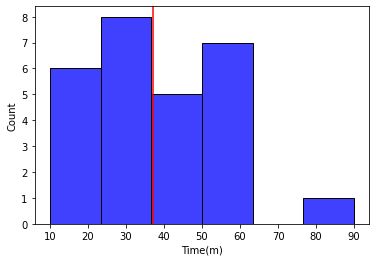

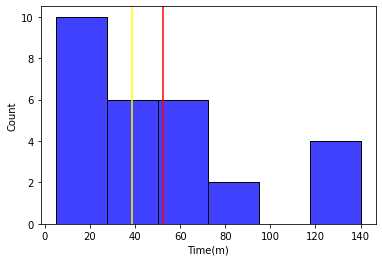

In [16]:
hist_plot=sns.histplot(x='Time(m)', 
                       data=df,
                       edgecolor='black', 
                       color='blue')
# Calculating the mean
mean=df['Time(m)'].mean()
median=df['Time(m)'].median()
#ploting the mean
plt.axvline(mean, color='red')
plt.axvline(median, color='yellow')

plt.show()

### The data is right skewed with an outlier between 120 and 140 mintues. The yellow line is the median and the red line is the mean, so the mean is greater than the median. 

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
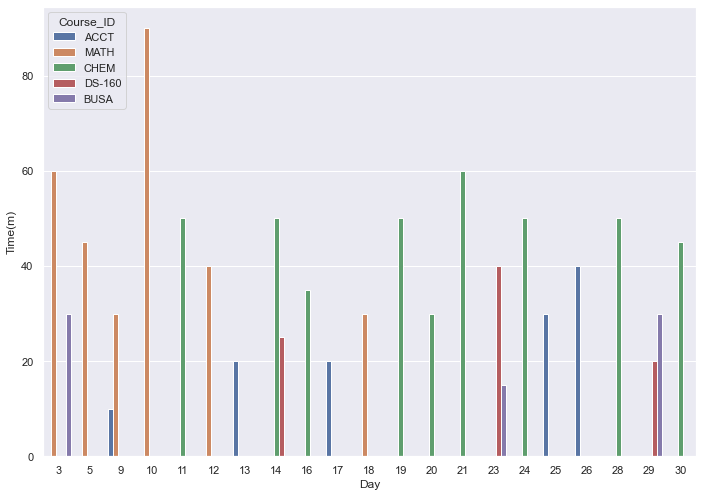

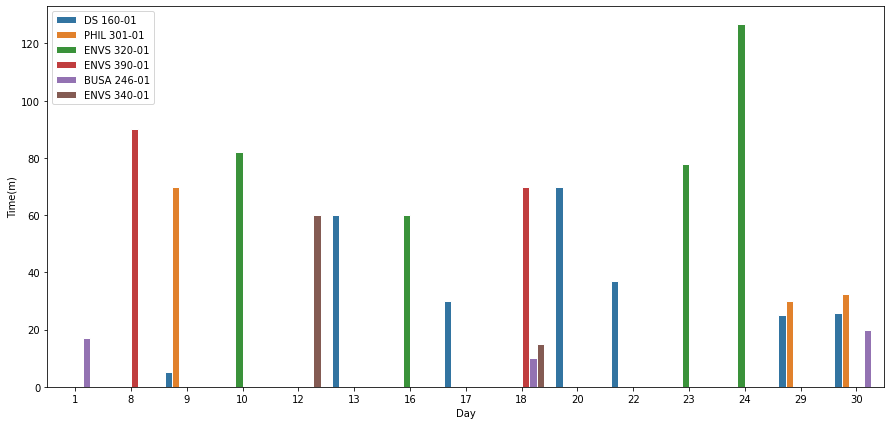

In [17]:
fig=plt.figure(figsize=(15,7))
bar=sns.barplot(x='Day',
                y='Time(m)',
                hue='Course_ID', 
                data=df,
                ci=False,
                edgecolor='white')
plt.legend(loc='upper left')

plt.show()

### I usualy spend about 60 min on a subject when I work on it, but I do not have many days that I have time to work on school work outside of class. I spend most time working on assignments in ENVS 320 and least on assignments in BUSA 246 and ENVS 340. - McKenzee M. 

### Investigate the measure of dispersion (table and plot) of time column.
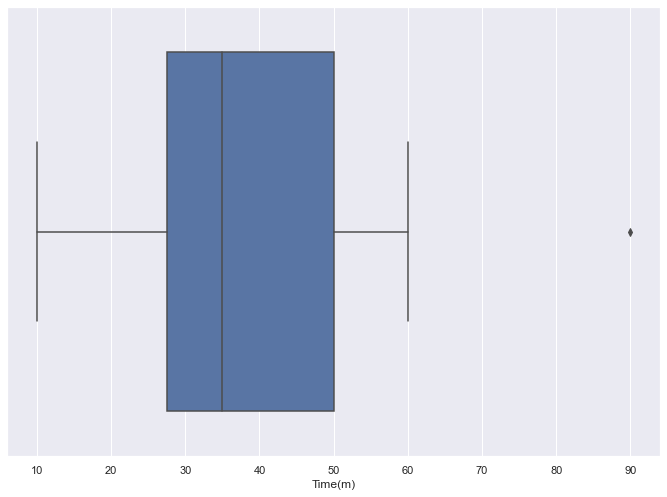

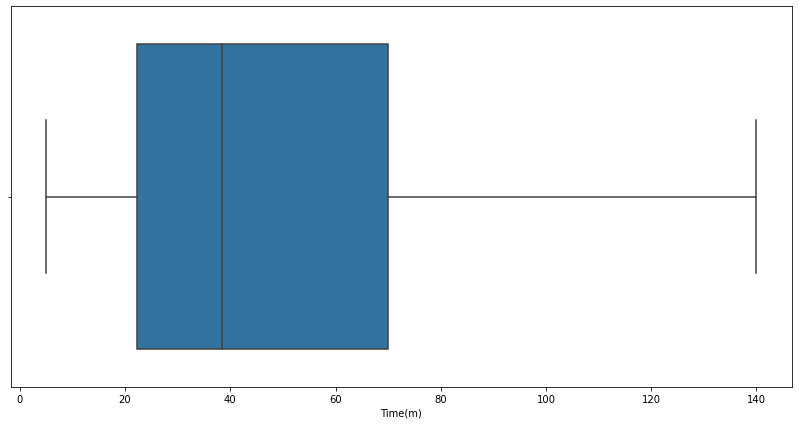

In [18]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df['Time(m)'], 
            orient='h')

plt.show()

### Most of the time amounts I spend working on assignments is between 20 and 70 minutes, with a minimum of less than 10 and a maximum of 140 minuntes. The median is a little less than 40 minutes. - McKenzee M. 

### Investigate the the distribution of time by Day_name
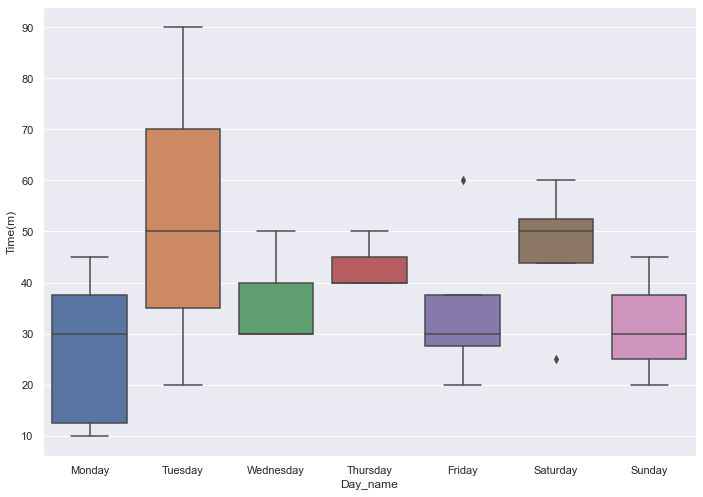

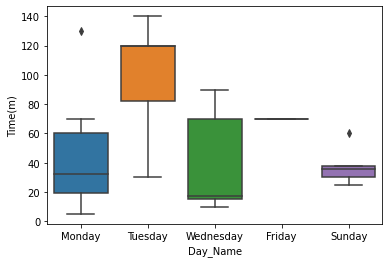

In [19]:
box=sns.boxplot(x='Day_Name', 
                y='Time(m)',
                data=df)

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
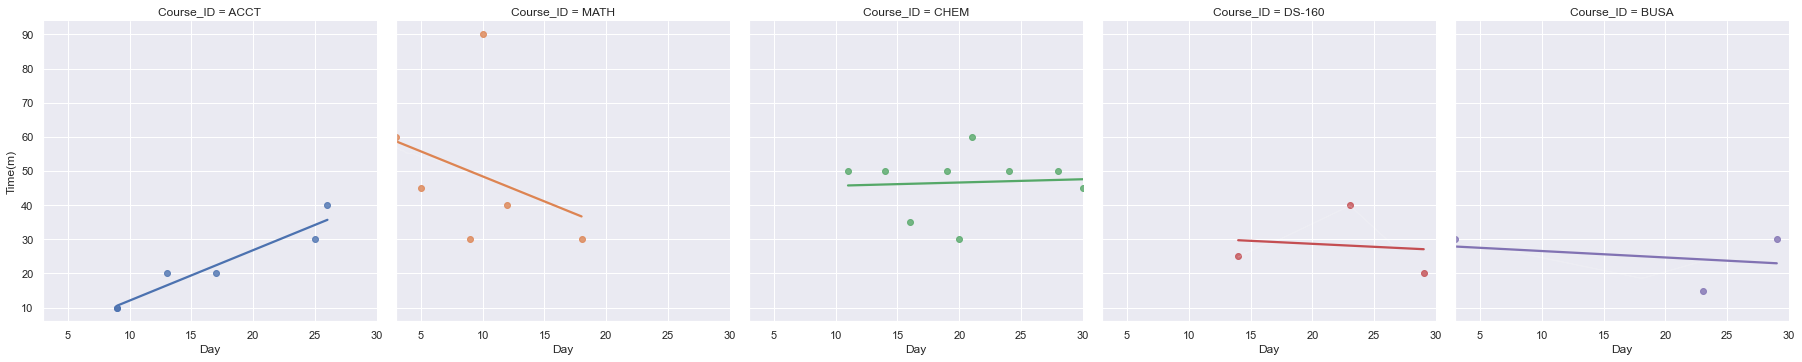

In [20]:
df.columns

Index(['Date', 'Course_ID', 'Time(m)', 'Day', 'Day_Name'], dtype='object')

<Figure size 1080x504 with 0 Axes>

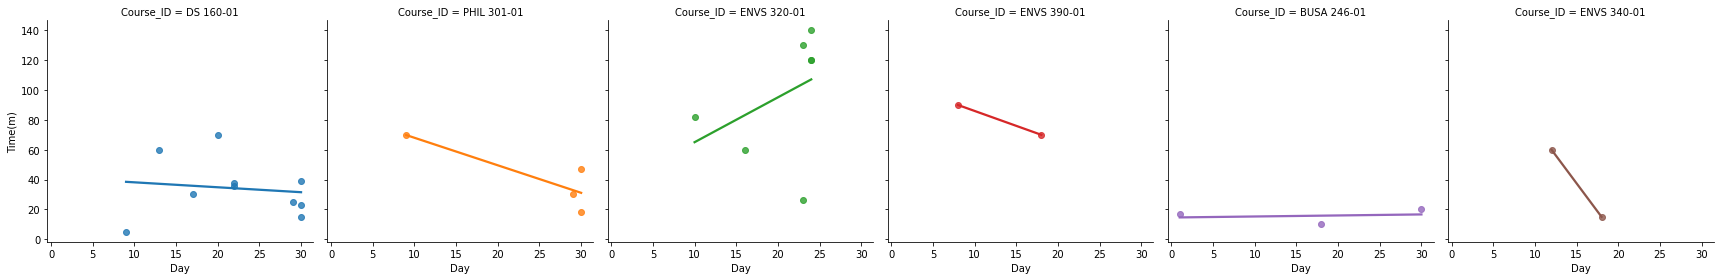

In [21]:
fig=plt.figure(figsize=(15,7))

sns.lmplot(x='Day', 
            y='Time(m)', 
            data=df, 
            ci=False, 
            hue='Course_ID',  
            col='Course_ID', 
            height=4)

plt.show()

### Create a pair plot of Day and Time and add course id as hue
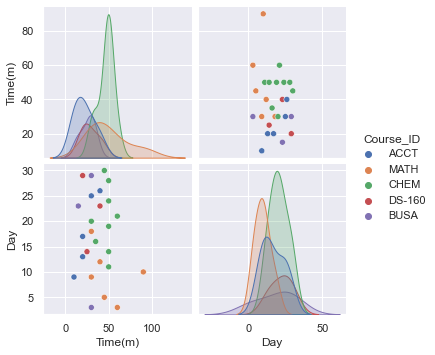

In [22]:
df[['Time(m)','Day']]

,Time(m),Day
0,5,9
1,70,9
2,82,10
3,60,16
4,30,17
5,70,18
6,10,18
7,15,18
8,70,20
9,36,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


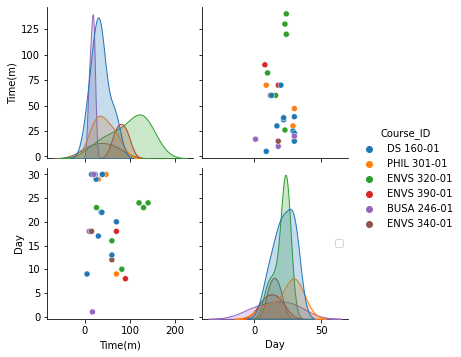

In [23]:
sns.pairplot(df,
             hue='Course_ID',
            )  
plt.legend(loc='center right')
plt.show()

### Display the Heatmap and comment on your findings
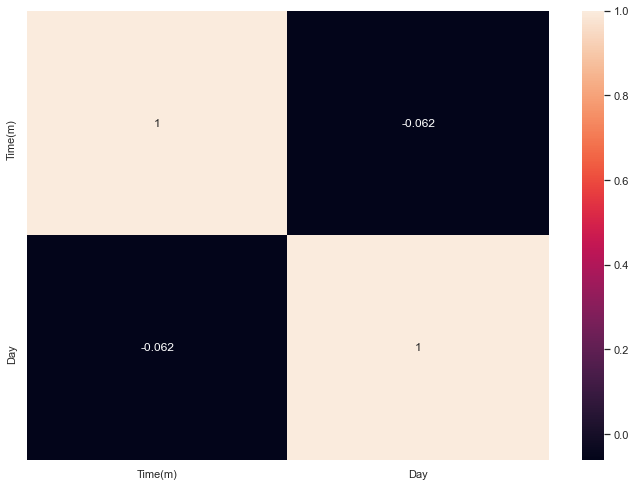

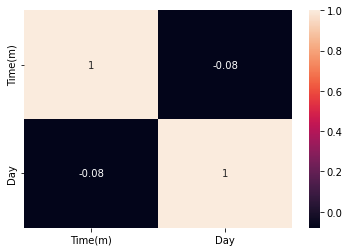

In [24]:
corr=df[['Time(m)','Day']].corr(method='pearson')

cols=['Time(m)','Day']
heat_map=sns.heatmap(corr, 
                     annot=True, 
                     xticklabels=cols, 
                     yticklabels=cols)

### There is a small negative correlation with day of the month and time spent working on assignments. So as the month days increase I spend less time on assigments, but the correlation is very small and I feel as though I consistently have assignments to work on through out the month. 

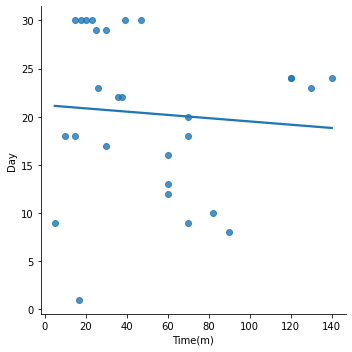

In [28]:
line=sns.lmplot(x='Time(m)', 
                  y='Day', 
                  data=df, 
                  ci=False)